In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os


In [2]:
def load_CIFAR_batch(filename):
    with open(filename, "rb") as f:
        datadict = pickle.load(f, encoding="latin1")
        X = datadict["data"]
        Y = datadict["labels"]
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("int")
        Y = np.array(Y)
        return X, Y


def load_CIFAR10(ROOT):
    """ load all of cifar batches (1-5 + test)"""
    xs = []
    ys = []
    for b in range(1, 6):
        f = os.path.join(ROOT, "data_batch_%d" % (b,))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, "test_batch"))
    return {
        "X_train": Xtr,
        "y_train": Ytr,
        "X_test": Xte,
        "y_test": Yte,
    }


In [3]:
CIFAR_DIR = r'./cifar-10-batches-py'

data = load_CIFAR10(CIFAR_DIR)
for k, v in list(data.items()):
    print(f"{k}: {v.shape}")

X_train: (50000, 32, 32, 3)
y_train: (50000,)
X_test: (10000, 32, 32, 3)
y_test: (10000,)


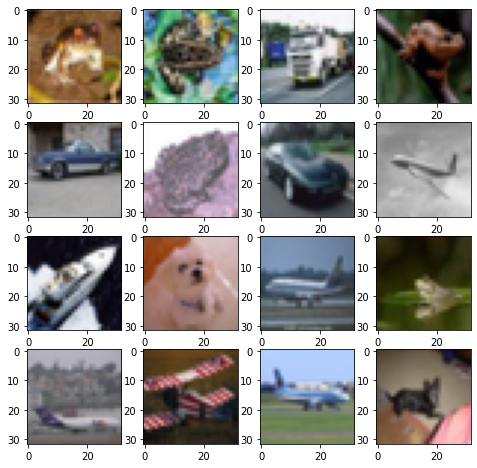

In [4]:
fig = plt.figure(figsize=(8, 8))


columns = 4
rows = 4
ids = [0, 200, 1000, 5000, 
       10000, 10200, 11000, 15000,
       20000, 20200, 21000, 25000,
       30000, 30200, 31000, 35000]
for i in range(1, columns*rows +1):
    img = data['X_train'][ids[i-1],:,:,:].squeeze()
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [16]:
print(data['y_train'][ids])

[6 6 9 6 1 6 1 0 8 5 0 6 0 0 0 5]
